<a href="https://colab.research.google.com/github/ysgrProgramming/solve_ivp_tutorial/blob/main/solve_ivp_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pythonで常微分方程式を解き物理アニメーションを作る

scipyのintegrate.solve_ivpで常微分方程式を解き、matplotlib.animationやIPython.display.HTMLで物理アニメーションを作成する。

## scipy.integrate.solve_ivpについて

> scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
>
> [scipy.integrate.solve_ivp — SciPy v1.8.1 Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)より引用

第一引数には導関数を指定し、第二引数には$t$の間隔を指定し、第三引数には初期値のリストを指定する。

### 一階常微分方程式の求解

試しに、次の微分方程式について解いてみる。

\begin{eqnarray}
\frac{dx}{dt} = -x, x(0)=1
\end{eqnarray}

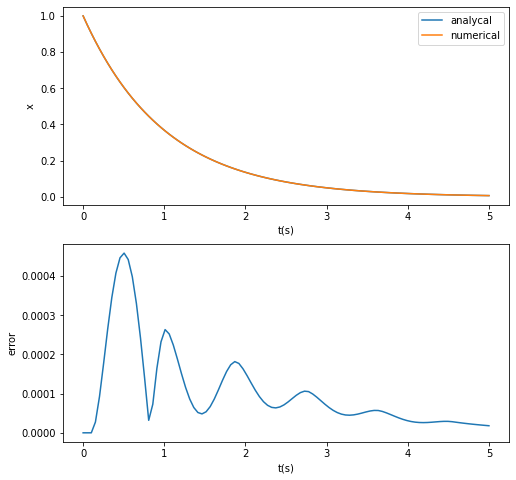

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def func(t, x):
    return -x

t_max = 5
t_span = [0, t_max]
t = np.linspace(0, t_max, 100)
init = [1]
sol = solve_ivp(func, t_span, init, t_eval=t)

def compare_plot(t, analycal, numerical):
    fig, axs = plt.subplots(2, figsize=(8, 8))
    axs[0].set_xlabel("t(s)")
    axs[0].set_ylabel("x")
    axs[0].plot(t, analycal, label="analycal")
    axs[0].plot(t, numerical, label="numerical")
    axs[0].legend()

    axs[1].set_xlabel("t(s)")
    axs[1].set_ylabel("error")
    axs[1].plot(t, abs(analycal-numerical))

    plt.show()

compare_plot(t, sol.y[0], np.exp(-t))

厳密解は$x(t)=\exp(-t)$であり、求解結果と一致している。誤差も少ない。

### 二階常微分方程式の求解

次に、二階常微分方程式であるニュートンの運動方程式について解いてみる。

\begin{eqnarray}
m \frac{d^2 x}{dt^2} = F, x(0)=0, \left.\frac{dx}{dt}\right|_{x=0}=-2
\end{eqnarray}

二階常微分方程式の時は、２つの一階常微分方程式に分ける。

\begin{eqnarray}
\frac{dx}{dt}=v, \frac{dv}{dt}=\frac{F}{m}
\end{eqnarray}

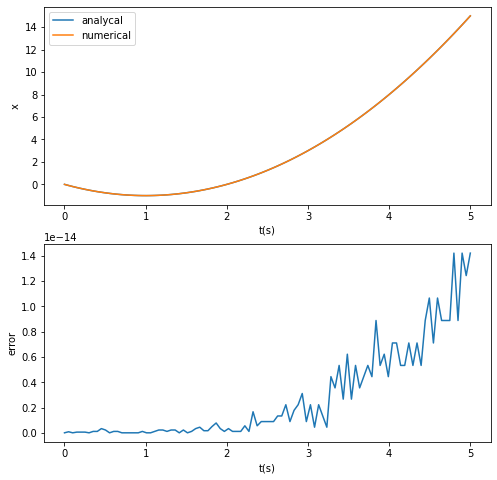

In [3]:
F, m = 1, 0.5
init = [0, -2]

def func(t, states):
    x, v = states
    d = np.zeros_like(states)
    d[0] = v
    d[1] = F/m
    return d

sol = solve_ivp(func, [0, t_max], init, t_eval=t)
ny = F/(2*m)*t**2-2*t
compare_plot(t, sol.y[0], ny)

厳密解は$x(t)=\frac{F}{2m}t^2-2t$であり、求解結果と一致している。誤差も少ない。

## アニメーションの作成方法

matplotlibのplot関数の返り値のリストを作成し、animation.ArtistAnimationの引数として代入することでアニメーションを作成することができる。

作成したアニメーションは、save関数によってgifアニメーションとして出力したり、IPython.display.HTMLによって簡易的な再生機能を持ったHTMLに変換することができる。

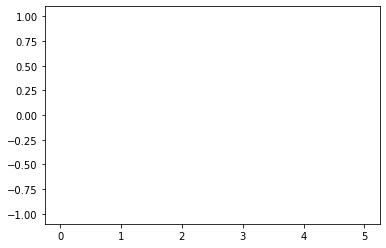

In [12]:
import matplotlib.animation as animation

def func(x, t):
    return np.sin(2*np.pi*(x-t))

x = np.linspace(0, 5)
dt = 0.05
ims = []
fig = plt.figure()
for i in range(50):
    t = dt*i
    im = plt.plot(x, func(x, t), "k-")
    ims.append(im)

anim = animation.ArtistAnimation(fig, ims, interval=dt)

anim.save("animation.gif", writer="pillow")